In [43]:
#Yusuf Ziya AK - Rıdvan Berkay HOCAOĞLU

#importing necessary libraries/packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [44]:
#reading dataset
df = pd.read_csv('cardetailsv3.csv', sep=',')

In [45]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [46]:
#cleaning NaNs
df = df.dropna()

In [47]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [48]:
#basic stats
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [49]:
#splitting name column into two columns named brand and model
pattern = r'([A-Z0-9._%+-]+) ([A-Z0-9._%+-]+)'

name = df['name'].str.findall(pattern, flags = re.IGNORECASE).str[0]

brand = name.str.get(0)
model = name.str.get(1)

df.insert(1, 'model', model)
df.insert(1, 'brand', brand)

df = df.drop(['name'], axis=1)

df.head()

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,Swift,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,Rapid,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,City,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,i20,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,Swift,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [50]:
#naming index as ad_number and resetting index

df = df.reset_index(drop=True)

df

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,Swift,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,Rapid,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,City,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,i20,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,Swift,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,i20,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,Hyundai,Verna,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,Maruti,Swift,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,Tata,Indigo,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Text(0.5, 0, 'Model year')

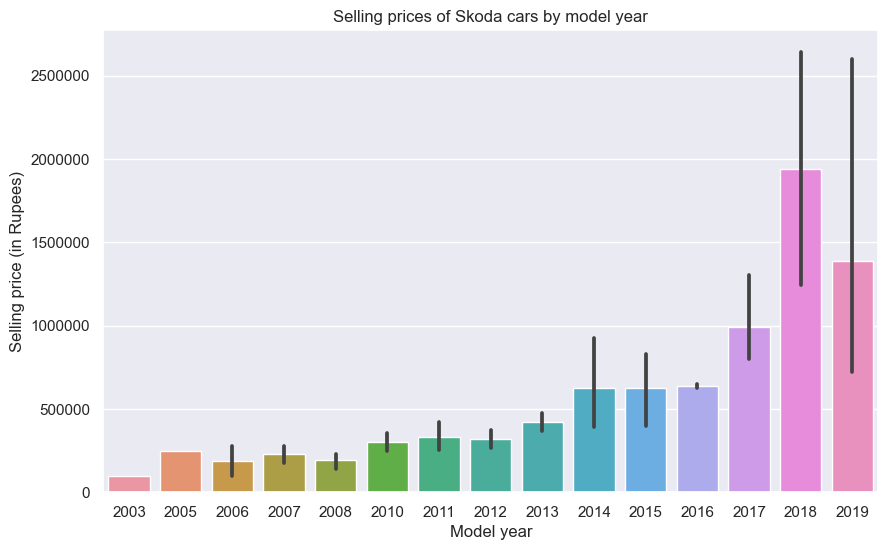

In [51]:
plt.figure(figsize=(10,6), dpi=100)

plt.ticklabel_format(style = 'plain')
sns.set(rc={'figure.figsize':(11.7,8.27)})

#creating dataframe that contains only skoda cars
skodas = df[df.brand == 'Skoda']

fig = sns.barplot(x = skodas.year.astype(int), y = skodas.selling_price, data=skodas)
fig.set_title("Selling prices of Skoda cars by model year")
fig.set_ylabel("Selling price (in Rupees)")
fig.set_xlabel("Model year")

In [52]:
df[(df.brand == 'Honda') & (df.fuel == "Diesel")].selling_price.mean()

673374.0503597122

In [53]:
df[(df.brand == 'Honda') & (df.fuel == "Petrol")].selling_price.mean()

564422.4464831804

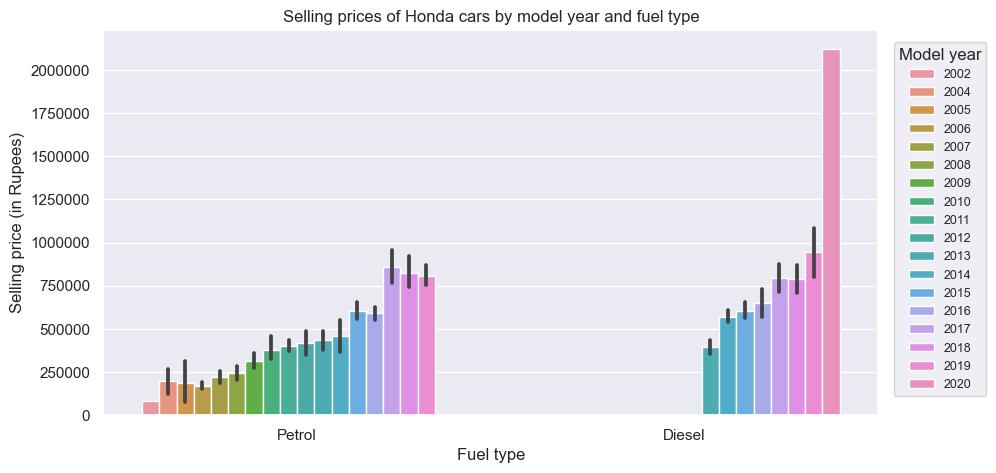

In [54]:
plt.figure(figsize=(10,5),dpi=100)
plt.ticklabel_format(style = 'plain')

hondas = df[df.brand == 'Honda']

fig = sns.barplot(x='fuel', y='selling_price', hue = hondas.year.astype(int), data=hondas)
fig.set_title("Selling prices of Honda cars by model year and fuel type")
fig.set_ylabel("Selling price (in Rupees)")
fig.set_xlabel("Fuel type")
fig.legend(title="Model year", loc=(1.02,0.05), fontsize=9)

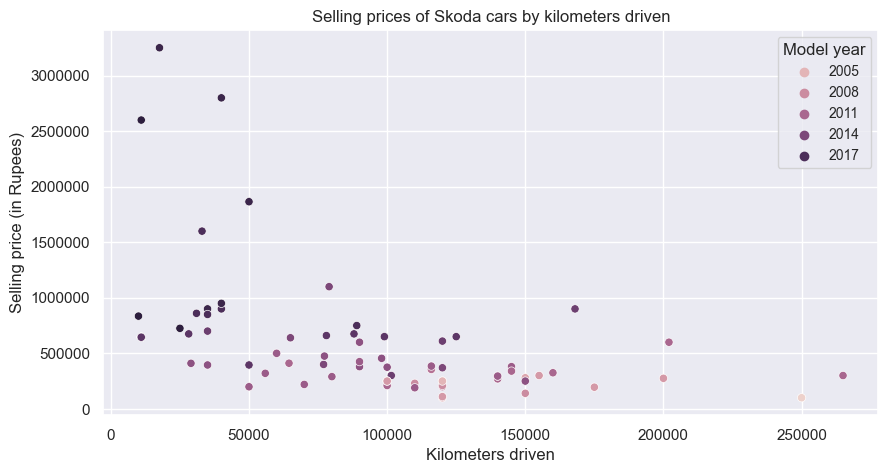

In [55]:
plt.figure(figsize=(10,5),dpi=100)
plt.ticklabel_format(style = 'plain')

fig = sns.scatterplot(x='km_driven', y='selling_price', hue=skodas.year.astype(int), data=skodas)
fig.set_title("Selling prices of Skoda cars by kilometers driven")
fig.set_ylabel("Selling price (in Rupees)")
fig.set_xlabel("Kilometers driven")
fig.legend(title="Model year", loc='upper right', fontsize=10)

Text(0.5, 0, 'Selling price (in Rupees)')

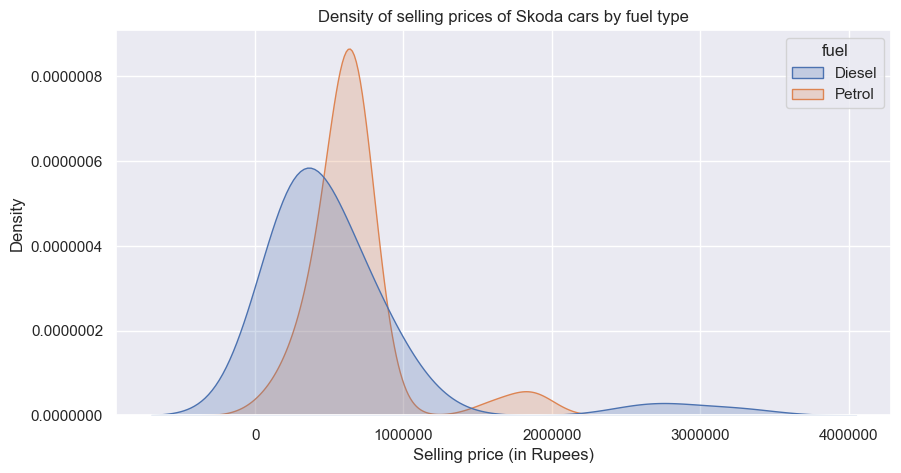

In [56]:
plt.figure(figsize=(10,5),dpi=100)
plt.ticklabel_format(style = 'plain')

fig = sns.kdeplot(data=skodas, x='selling_price', hue='fuel', fill=True)
fig.set_title("Density of selling prices of Skoda cars by fuel type")
fig.set_xlabel("Selling price (in Rupees)")

Text(0, 0.5, 'Selling price (in Rupees)')

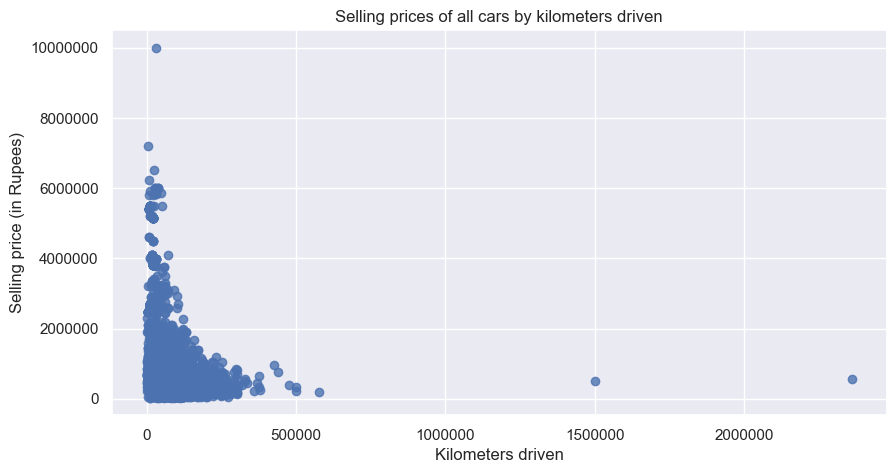

In [57]:
plt.figure(figsize=(10,5),dpi=100)
plt.ticklabel_format(style = 'plain')

fig = sns.regplot(x='km_driven', y='selling_price', data=df, fit_reg=False)
fig.set_title("Selling prices of all cars by kilometers driven")
fig.set_xlabel("Kilometers driven")
fig.set_ylabel("Selling price (in Rupees)")

Text(0, 0.5, 'Count')

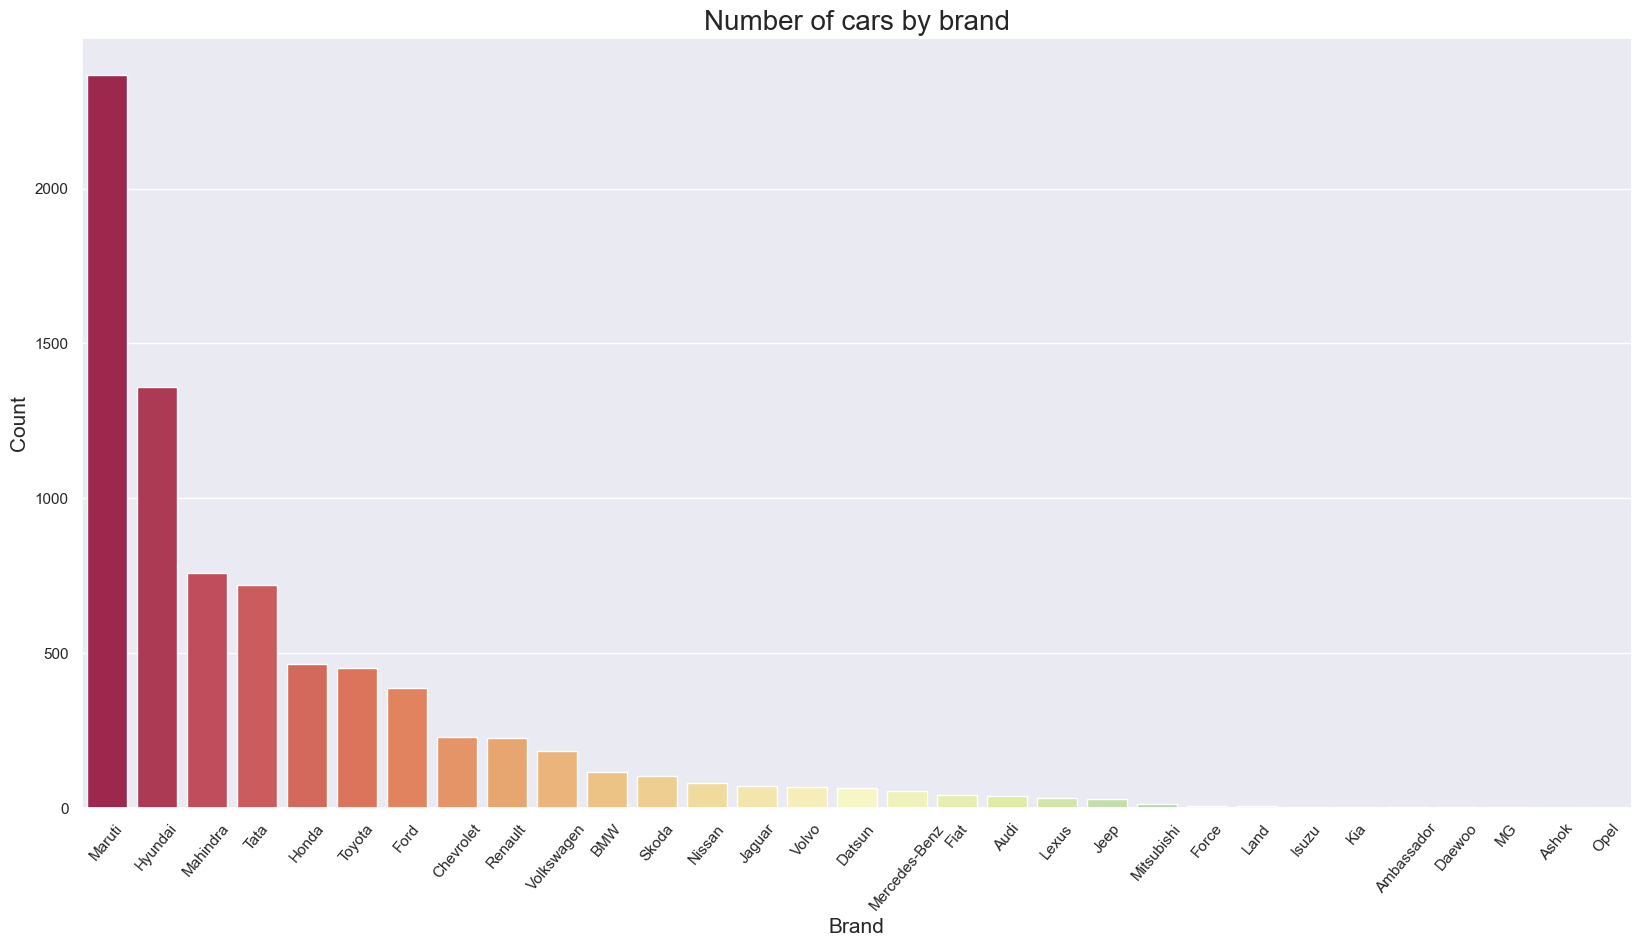

In [58]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=50)

fig = sns.countplot(df, x='brand', palette='Spectral', order = df['brand'].value_counts().index)
fig.set_title("Number of cars by brand", fontsize= 20)
fig.set_xlabel("Brand", fontsize= 15)
fig.set_ylabel("Count", fontsize= 15)

In [59]:
#converting engine column to int
pattern2 = r'([A-Z0-9._%+-]+) ([A-Z0-9._%+-]+)'

engineCc = df['engine'].str.findall(pattern, flags = re.IGNORECASE).str[0]

engineInCc = engineCc.str.get(0)

df['engine'] = engineInCc.astype(int)
df.rename(columns = {'engine':'engine_cc'}, inplace = True)

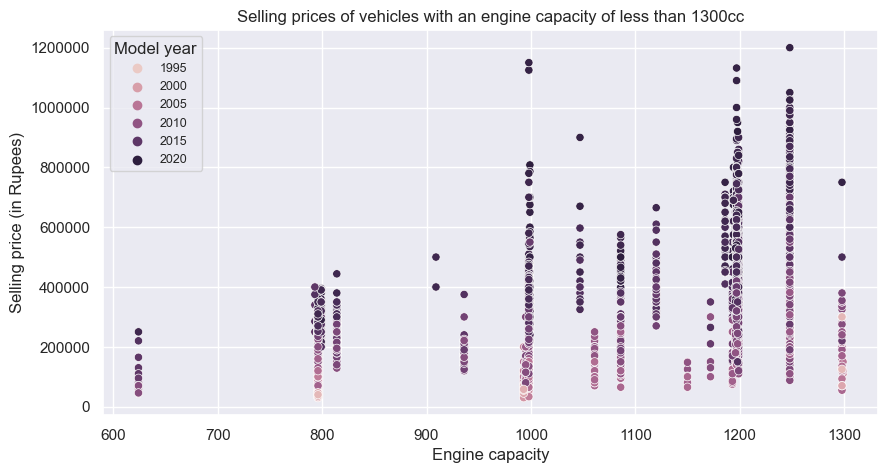

In [60]:
plt.figure(figsize=(10,5),dpi=100)
plt.ticklabel_format(style = 'plain')

fig = sns.scatterplot(x=df[df['engine_cc'] < 1300]['engine_cc'], y='selling_price', hue = df.year.astype(int), data=df)
fig.set_title("Selling prices of vehicles with an engine capacity of less than 1300cc")
fig.set_ylabel("Selling price (in Rupees)")
fig.set_xlabel("Engine capacity")
fig.legend(title="Model year", loc='upper left', fontsize=9)
fig.set_xticks=([600, 700, 800, 900, 1000, 1200, 1300])